Q1. What is the mathematical formula for a linear SVM?  
Q2. What is the objective function of a linear SVM?  
Q3. What is the kernel trick in SVM?  
Q4. What is the role of support vectors in SVM Explain with example  
Q5. Illustrate with examples and graphs of Hyperplane, Marginal plane, Soft margin and Hard margin in
SVM?  
Q6. SVM Implementation through Iris dataset. 
~ Load the iris dataset from the scikit-learn library and split it into a training set and a testing set  
~ Train a linear SVM classifier on the training set and predict the labels for the testing set  
~ Compute the accuracy of the model on the testing set   
~ Plot the decision boundaries of the trained model using two of the features  
~ Try different values of the regularisation parameter C and see how it affects the performance of
the model.     

Bonus task: Implement a linear SVM classifier from scratch using Python and compare its
performance with the scikit-learn implementation.  

### Q1. What is the mathematical formula for a linear SVM?

The mathematical formula for a linear Support Vector Machine (SVM) can be expressed as follows:

Given a dataset { $(\mathbf{x}_1, y_1) $, $(mathbf{x}_2, y_2)$, $(\ldots)$, $(\mathbf{x}_n, y_n)$ }, where $ \mathbf{x}_i $ represents the feature vector of the \( i \)th sample and $ y_i $ is its corresponding class label (either -1 or 1), the objective of a linear SVM is to find the optimal hyperplane that separates the classes with the maximum margin.

The hyperplane can be represented by the equation:

$[ \mathbf{w}^T \cdot \mathbf{x} + b = 0 ]$

where:
- $( \mathbf{w} )$ is the weight vector perpendicular to the hyperplane,
- $( \mathbf{x} )$ is the input feature vector,
- $( b )$ is the bias or intercept term.

The decision function of the SVM is:

$[ f(\mathbf{x}) = \text{sign}(\mathbf{w}^T \cdot \mathbf{x} + b) ]$

The margin between the classes is proportional to the magnitude of the weight vector \( \mathbf{w} \). The optimization objective of the SVM is to maximize this margin, subject to the constraint that all data points are correctly classified, which can be formulated as the following optimization problem:

$[ \min_{\mathbf{w}, b} \frac{1}{2} \lVert \mathbf{w} \rVert^2 ]$

subject to:

$[ y_i(\mathbf{w}^T \cdot \mathbf{x}_i + b) \geq 1 ]$

for all training samples $( i = 1, 2, \ldots, n )$.

In practice, this optimization problem is often solved using techniques such as gradient descent or specialized quadratic programming algorithms.

### Q2. What is the objective function of a linear SVM?

Objective Function:
minimize: (1/2) * ||w||^2

Constraints:
for all training samples i = 1, 2, ..., n:
    yi(w^T * xi + b) >= 1

where:
- w is the weight vector perpendicular to the hyperplane
- b is the bias or intercept term
- xi represents the feature vector of the i-th sample
- yi is its corresponding class label (either -1 or 1)


### Q3. What is the kernel trick in SVM?

The kernel trick in SVM is a method used to implicitly map data into higher-dimensional feature spaces without actually computing the transformed feature vectors explicitly. This allows SVMs to efficiently handle non-linear decision boundaries by finding the optimal hyperplane in the transformed space. The kernel function computes the dot product between the feature vectors in the higher-dimensional space without explicitly computing the transformation, thereby avoiding the computational cost associated with it.

In mathematical terms, the kernel trick can be expressed as follows:

Given two input feature vectors $( x_i )$ and $( x_j )$, the kernel function $( K(x_i, x_j) )$ computes the dot product of their corresponding transformed feature vectors \( \phi(x_i) \) and \( \phi(x_j) \) in the higher-dimensional space:

$[ K(x_i, x_j) = \langle \phi(x_i), \phi(x_j) \rangle ]$

By choosing an appropriate kernel function (such as linear, polynomial, Gaussian RBF, etc.), SVMs can effectively capture complex relationships between data points in the input space without explicitly computing the transformations.

### Q4. What is the role of support vectors in SVM Explain with example

In SVM, support vectors are the data points that lie closest to the decision boundary (hyperplane) and influence its position. These points are crucial because they determine the position and orientation of the decision boundary. 

For example, consider a binary classification problem with two classes, labeled as positive and negative. The support vectors are the data points from both classes that are nearest to the decision boundary. If we remove or modify any of these support vectors, the position of the decision boundary will change.

In the context of the mathematical formulation of SVM, support vectors are the data points that have non-zero coefficients (weights) in the solution to the optimization problem. They lie on or within the margin boundary, and they contribute to defining the hyperplane that maximizes the margin between classes.


### Q5. Illustrate with examples and graphs of Hyperplane, Marginal plane, Soft margin and Hard margin in SVM?

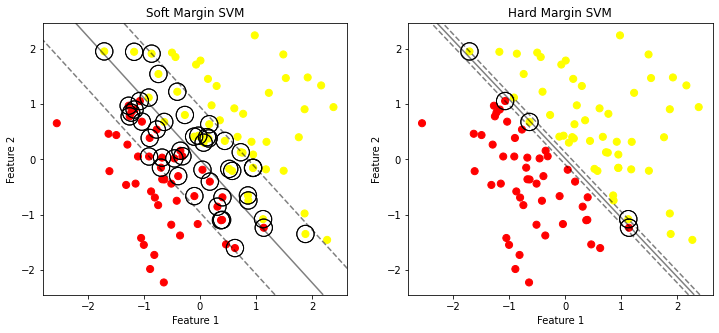

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import svm

# Generating synthetic dataset
np.random.seed(0)
X = np.random.randn(100, 2)
y = np.where(X[:, 0] + X[:, 1] > 0, 1, -1)

# Fit SVM models
clf_soft = svm.SVC(kernel='linear', C=0.1)
clf_soft.fit(X, y)

clf_hard = svm.SVC(kernel='linear', C=100)
clf_hard.fit(X, y)

# Plotting decision boundary and margins
def plot_svc_decision_function(model, ax=None, plot_support=True):
    """Plot the decision function for a 2D SVC"""
    if ax is None:
        ax = plt.gca()
    xlim = ax.get_xlim()
    ylim = ax.get_ylim()
    
    # create grid to evaluate model
    x = np.linspace(xlim[0], xlim[1], 30)
    y = np.linspace(ylim[0], ylim[1], 30)
    Y, X = np.meshgrid(y, x)
    xy = np.vstack([X.ravel(), Y.ravel()]).T
    P = model.decision_function(xy).reshape(X.shape)
    
    # plot decision boundary and margins
    ax.contour(X, Y, P, colors='k',
               levels=[-1, 0, 1], alpha=0.5,
               linestyles=['--', '-', '--'])
    
    # plot support vectors
    if plot_support:
        ax.scatter(model.support_vectors_[:, 0],
                   model.support_vectors_[:, 1],
                   s=300, linewidth=1, facecolors='none', edgecolors='k')
    ax.set_xlim(xlim)
    ax.set_ylim(ylim)

# Plotting
fig, ax = plt.subplots(1, 2, figsize=(12, 5))

# Soft Margin
ax[0].scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='autumn')
plot_svc_decision_function(clf_soft, ax[0])
ax[0].scatter(clf_soft.support_vectors_[:, 0], clf_soft.support_vectors_[:, 1],
              s=300, lw=1, facecolors='none', edgecolors='k')
ax[0].set_title('Soft Margin SVM')
ax[0].set_xlabel('Feature 1')
ax[0].set_ylabel('Feature 2')

# Hard Margin
ax[1].scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='autumn')
plot_svc_decision_function(clf_hard, ax[1])
ax[1].scatter(clf_hard.support_vectors_[:, 0], clf_hard.support_vectors_[:, 1],
              s=300, lw=1, facecolors='none', edgecolors='k')
ax[1].set_title('Hard Margin SVM')
ax[1].set_xlabel('Feature 1')
ax[1].set_ylabel('Feature 2')

plt.show()


### Q6. SVM Implementation through Iris dataset. ~ Load the iris dataset from the scikit-learn library and split it into a training set and a testing set
### ~ Train a linear SVM classifier on the training set and predict the labels for the testing set
### ~ Compute the accuracy of the model on the testing set
### ~ Plot the decision boundaries of the trained model using two of the features
### ~ Try different values of the regularisation parameter C and see how it affects the performance of the model.

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler



In [3]:
# Load the Iris dataset
iris = load_iris()
X, y = iris.data, iris.target




In [4]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [5]:
# Standardize the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


In [6]:
# Define the parameter grid for grid search
param_grid = {'C': [0.001, 0.01, 0.1, 1, 10, 100]}

# Perform grid search with cross-validation to find the best value of C
svm_classifier = SVC(kernel='linear')
grid_search = GridSearchCV(svm_classifier, param_grid, cv=5)
grid_search.fit(X_train_scaled, y_train)



GridSearchCV(cv=5, estimator=SVC(kernel='linear'),
             param_grid={'C': [0.001, 0.01, 0.1, 1, 10, 100]})

Best value of C: 10
Accuracy: 0.9666666666666667


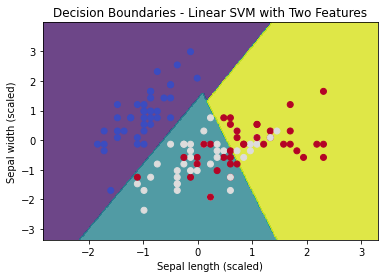

In [7]:
# Get the best value of C from the grid search
best_C = grid_search.best_params_['C']
print("Best value of C:", best_C)

# Train a linear SVM classifier with the best C on the training set
svm_classifier_best = SVC(kernel='linear', C=best_C)
svm_classifier_best.fit(X_train_scaled, y_train)

# Predict the labels for the testing set
y_pred = svm_classifier_best.predict(X_test_scaled)

# Compute the accuracy of the model on the testing set
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

# Plot the decision boundaries of the trained model using two features
# For visualization, we'll consider only the first two features
X_train_2d = X_train_scaled[:, :2]

# Train a linear SVM classifier on the scaled training set
svm_classifier_2d = SVC(kernel='linear', C=best_C)
svm_classifier_2d.fit(X_train_2d, y_train)

# Plot decision boundaries
x_min, x_max = X_train_2d[:, 0].min() - 1, X_train_2d[:, 0].max() + 1
y_min, y_max = X_train_2d[:, 1].min() - 1, X_train_2d[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.02), np.arange(y_min, y_max, 0.02))
Z = svm_classifier_2d.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

plt.contourf(xx, yy, Z, alpha=0.8)
plt.scatter(X_train_2d[:, 0], X_train_2d[:, 1], c=y_train, cmap=plt.cm.coolwarm)
plt.xlabel('Sepal length (scaled)')
plt.ylabel('Sepal width (scaled)')
plt.title('Decision Boundaries - Linear SVM with Two Features')
plt.show()